In [25]:
import sys
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
print('python version:',sys.version)
print('tensorflow version:',tf.__version__)

python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
tensorflow version: 2.1.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# load_data()方法的返回值为：Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
len(train_labels)

60000

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

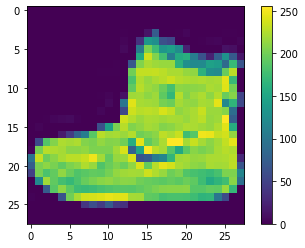

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

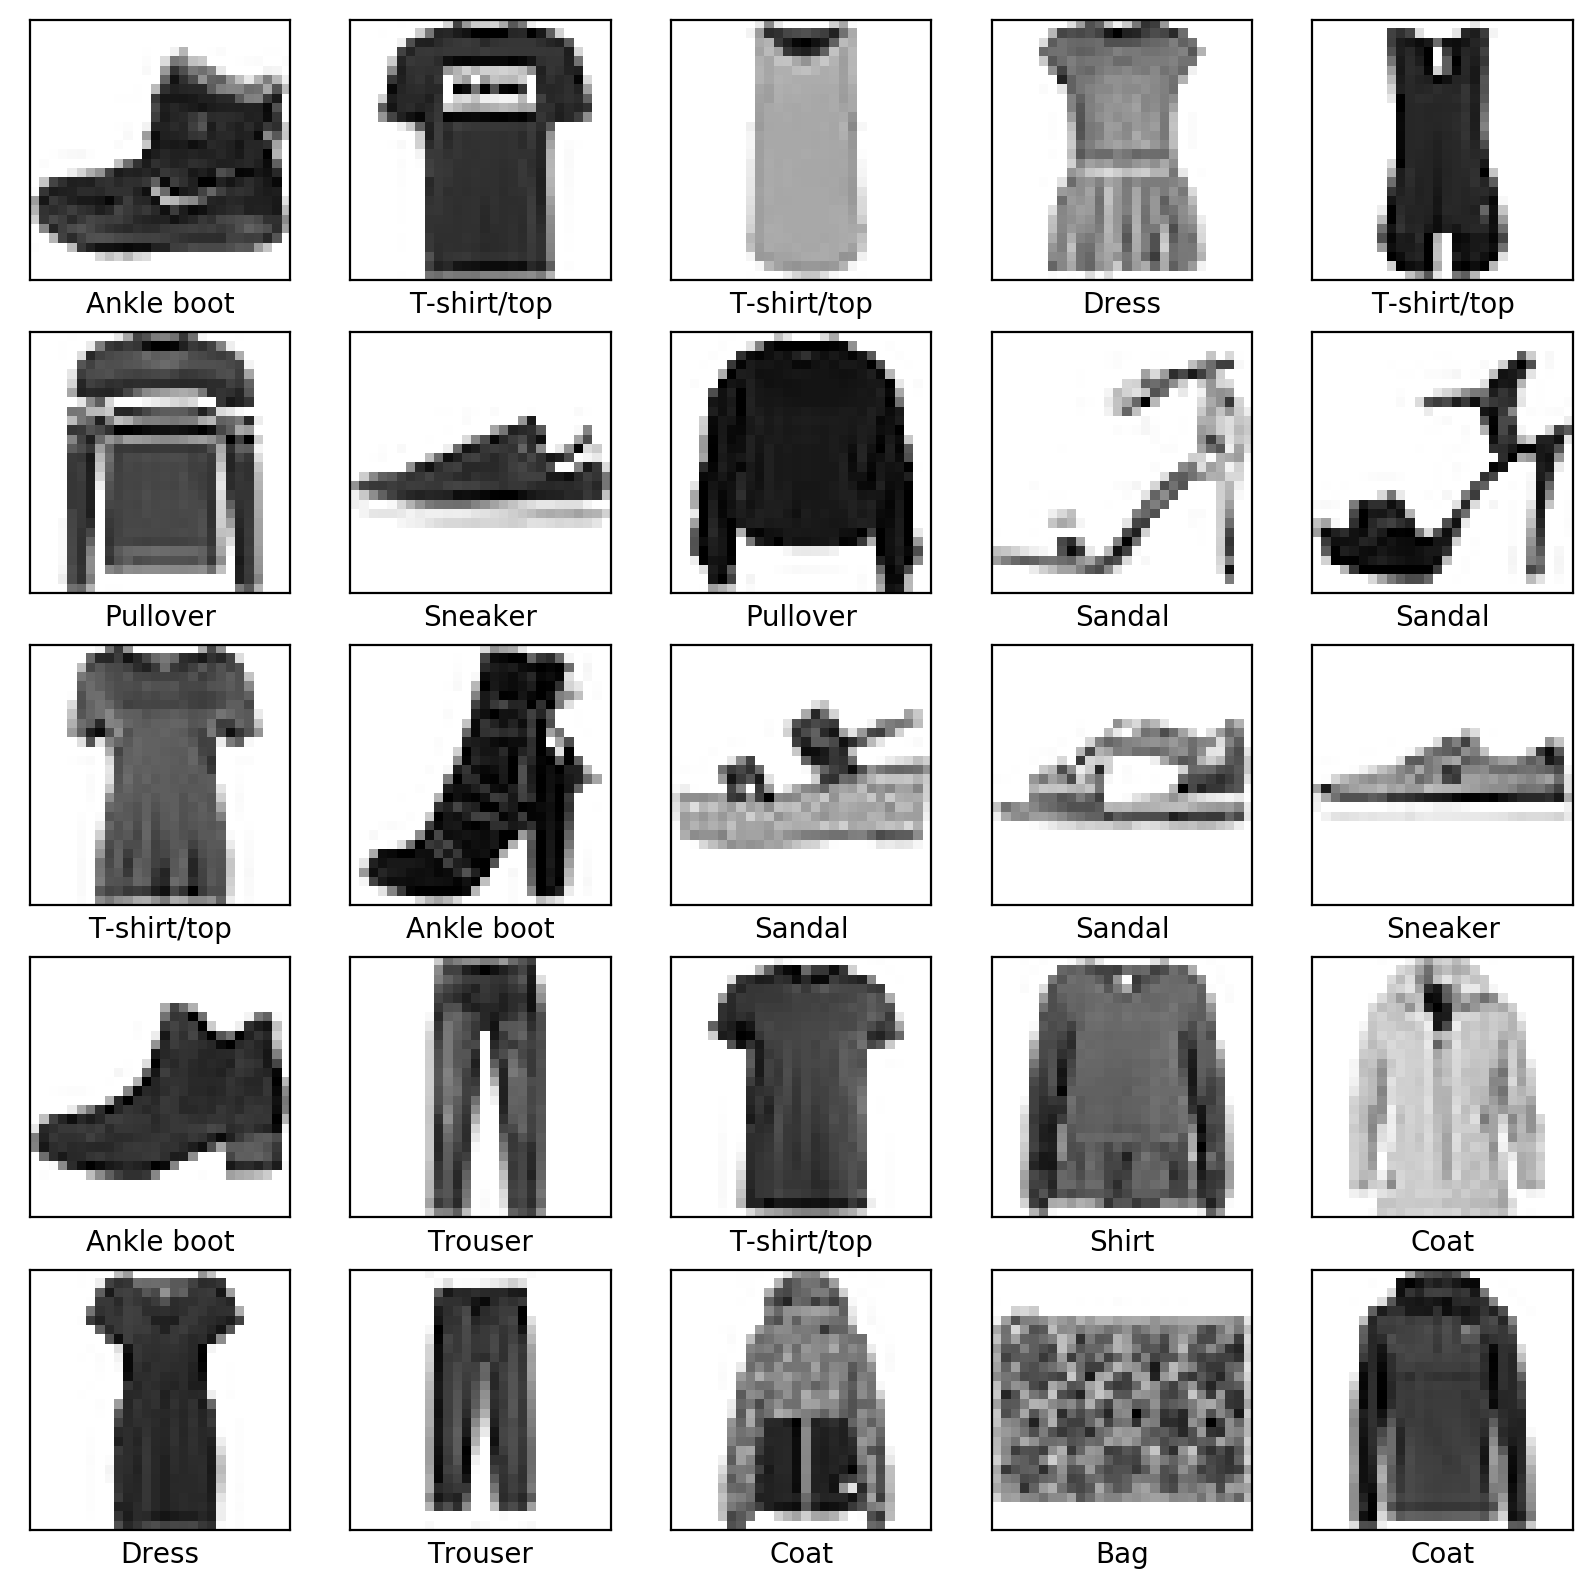

In [15]:
plt.figure(figsize=(10,10), dpi=200)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # 屏蔽坐标显示，下同
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.4929 - accuracy: 0.8267
Epoch 2/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3701 - accuracy: 0.8675
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3331 - accuracy: 0.8773
Epoch 4/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3099 - accuracy: 0.8868
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2930 - accuracy: 0.8926
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2792 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2673 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2565 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2461 - accuracy: 0.9075
Epoch 10/10
6

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3307 - accuracy: 0.8846

Test accuracy: 0.8846


In [21]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [22]:
predictions = probability_model.predict(test_images)

In [23]:
predictions[0]

array([6.1835679e-09, 5.0825996e-11, 1.7550703e-10, 1.2875578e-15,
       5.0945664e-11, 1.6961206e-04, 6.4031923e-08, 3.5876669e-03,
       1.0340054e-08, 9.9624264e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
    '''
    该函数实现打印预测的图片
    '''
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([]) # 屏蔽坐标显示，下同
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array) # 取出预测最大概率的标签
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], # 打印预测标签
                            100*np.max(predictions_array), # 打印置信度
                            class_names[true_label]), # 打印真实标签
                            color=color)

def plot_value_array(i, predictions_array, true_label):
    '''
    该函数实现绘制概率柱状图
    '''
    predictions_array, true_label = predictions_array, true_label[i]
    
    plt.grid(False) # 屏蔽格线显示
    plt.xticks(range(10))
    plt.yticks([]) 
    thisplot = plt.bar(range(10), predictions_array, color="#777777") # 绘制柱状图
    plt.ylim([0, 1]) # 设置y轴刻度显示范围
    
    predicted_label = np.argmax(predictions_array) # 取出预测标签

    thisplot[predicted_label].set_color('red') # 设置柱状图中预测标签的颜色
    thisplot[true_label].set_color('blue') 
    
def merged_result(i):
    '''
    该函数实现汇总以上两个函数输出结果，提供预测某张照片索引的接口
    '''
    plt.figure(figsize=(6,3), dpi=150)
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()

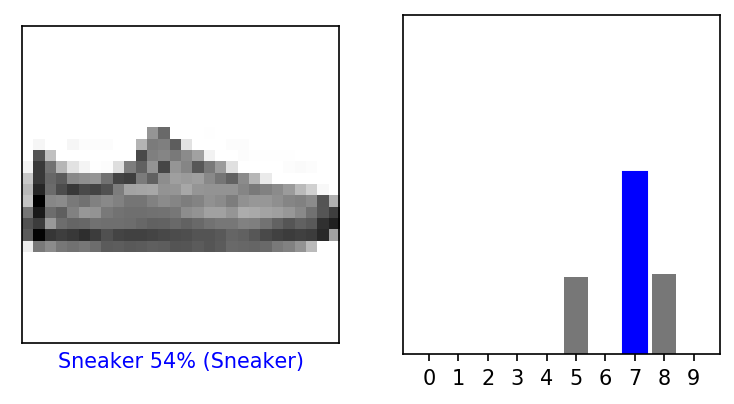

In [35]:
i = 12
merged_result(i)

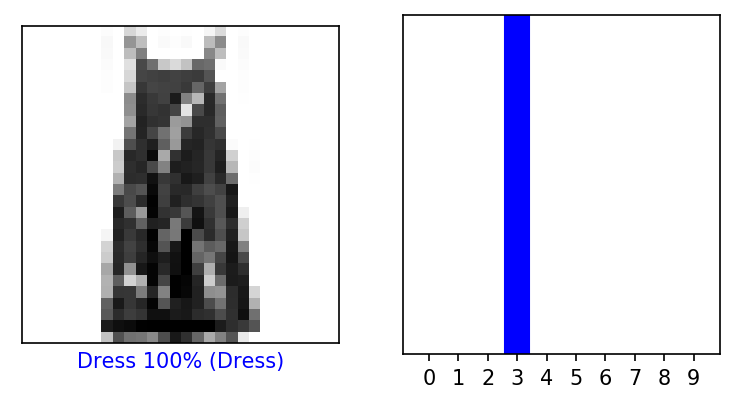

In [36]:
i = 450
merged_result(i)

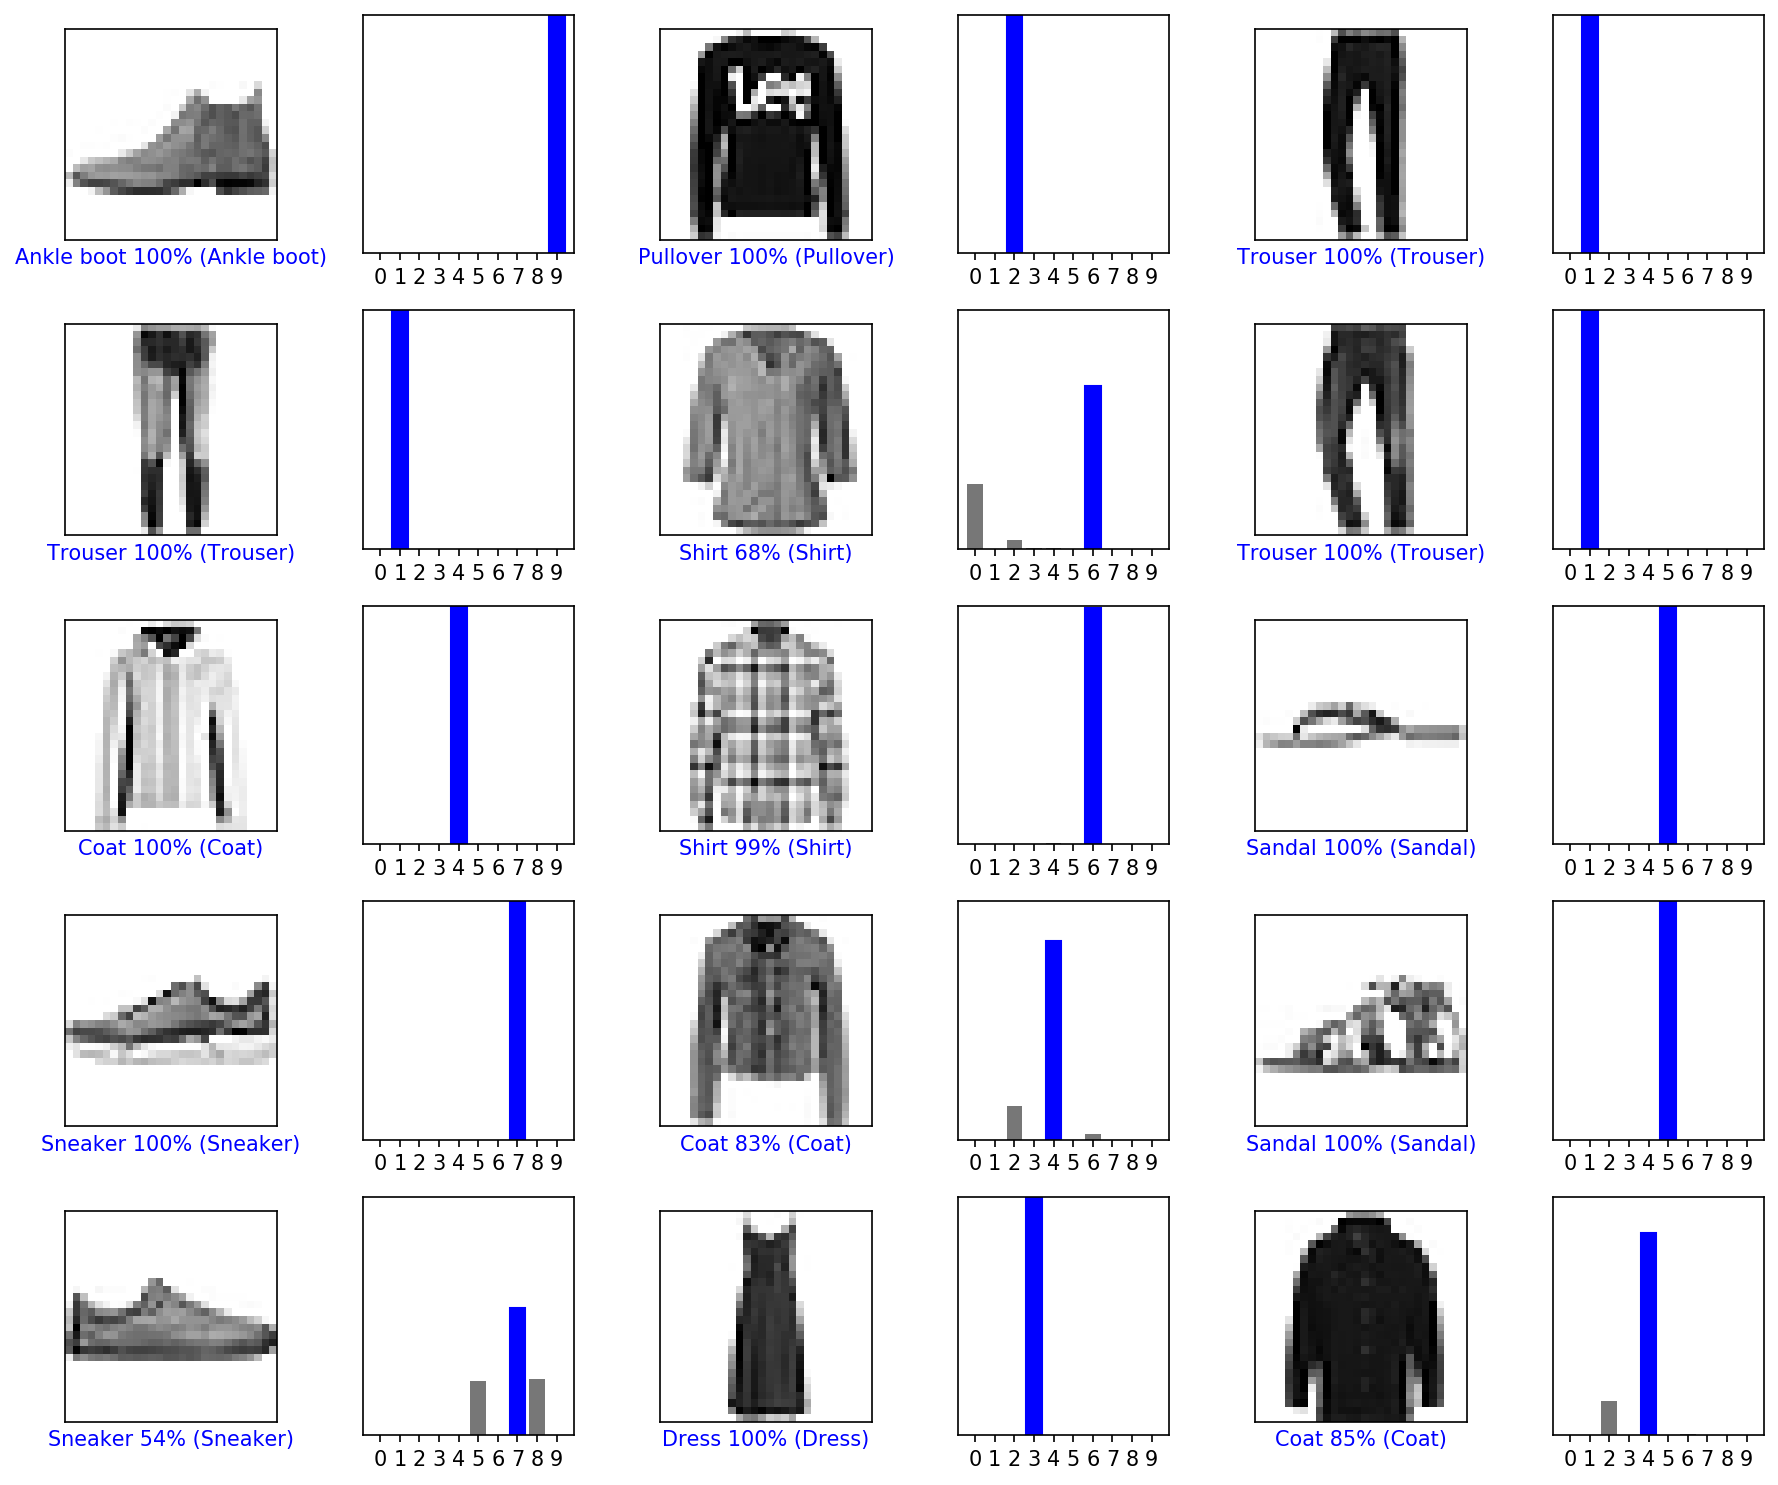

In [38]:
def plot_images(num_rows, num_cols):
    '''
    该函数实现多个预测结果输出
    '''
    num_images = num_rows*num_cols # 绘制图片数量
    
    plt.figure(figsize=(2*2*num_cols, 2*num_rows), dpi=150) # 设置画布尺寸
    
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1) # 第i个子图的位置
        plot_image(i, predictions[i], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], test_labels)

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    num_rows = 5
    num_cols = 3
    plot_images(num_rows, num_cols)

predictions_single:
 [[0.19836323 0.01996289 0.1276678  0.28869623 0.05913025 0.044572
  0.25288364 0.00403849 0.00407252 0.00061292]]
predict label: 3
true label: 2


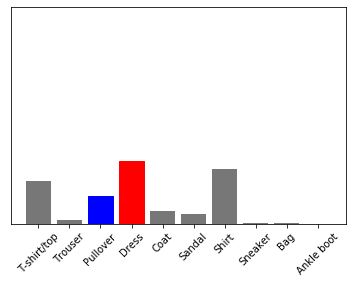

In [61]:
def predict_image(i):
    
    img = test_images[i] # shape=(28,28)
    img = (np.expand_dims(img,0)) # shape=(1,28,28)，转化成列表格式，训练集和测试集的shape为(None,28,28)
    predictions_single = probability_model.predict(img)  # 预测
    print('predictions_single:\n', predictions_single)
    plot_value_array(1, predictions_single[0], test_labels) # 绘图
    _ = plt.xticks(range(10), class_names, rotation=45) # 设置x轴坐标刻度
    print('predict label:', np.argmax(predictions_single[0]))
    print('true label:', test_labels[i])

predict_image(66)    